## Clasificación utilizando XGBoost (Core)

### **Objetivo:** Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset:** [Heart Disease UCI](https://www.kaggle.com/datasets/ronitf/heart-disease-uci)

**Descripción del Dataset:** El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.


**Instrucciones:**

### **Parte 1:** Carga y Exploración Inicial de Datos

#### 1. Carga del Dataset:

- Cargar el dataset desde Kaggle.


In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:

  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M


#### 2. Exploración Inicial:

- Revisar la estructura del dataset.
- Describir las variables y su distribución.
- Identificar y documentar valores faltantes y outliers.


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [5]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


#### Describir las variables y su distribucion

**Additional Information**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.

**Only 14 attributes used:**

      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

In [6]:
# cambiar el data type de las columnas
columns_to_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

for column in columns_to_convert:
    X[column] = X[column].astype('category')

# Verifica los cambios
print(X.dtypes)


age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
dtype: object


C:\Users\diego\AppData\Local\Temp\ipykernel_29604\778353458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype('category')



### **Parte 2:** Análisis Exploratorio de Datos (EDA)

#### Análisis Estadístico Descriptivo:

- Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
- Analizar la distribución de las variables categóricas.

#### Visualizaciones:
- Crear histogramas y gráficos de barras para entender la distribución de las variables.
- Crear un mapa de calor para visualizar las correlaciones entre las variables.
- Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

In [7]:
# numerical features analysis
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numerical_stats = X[numerical_features].describe()
numerical_stats

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<Figure size 1500x600 with 0 Axes>

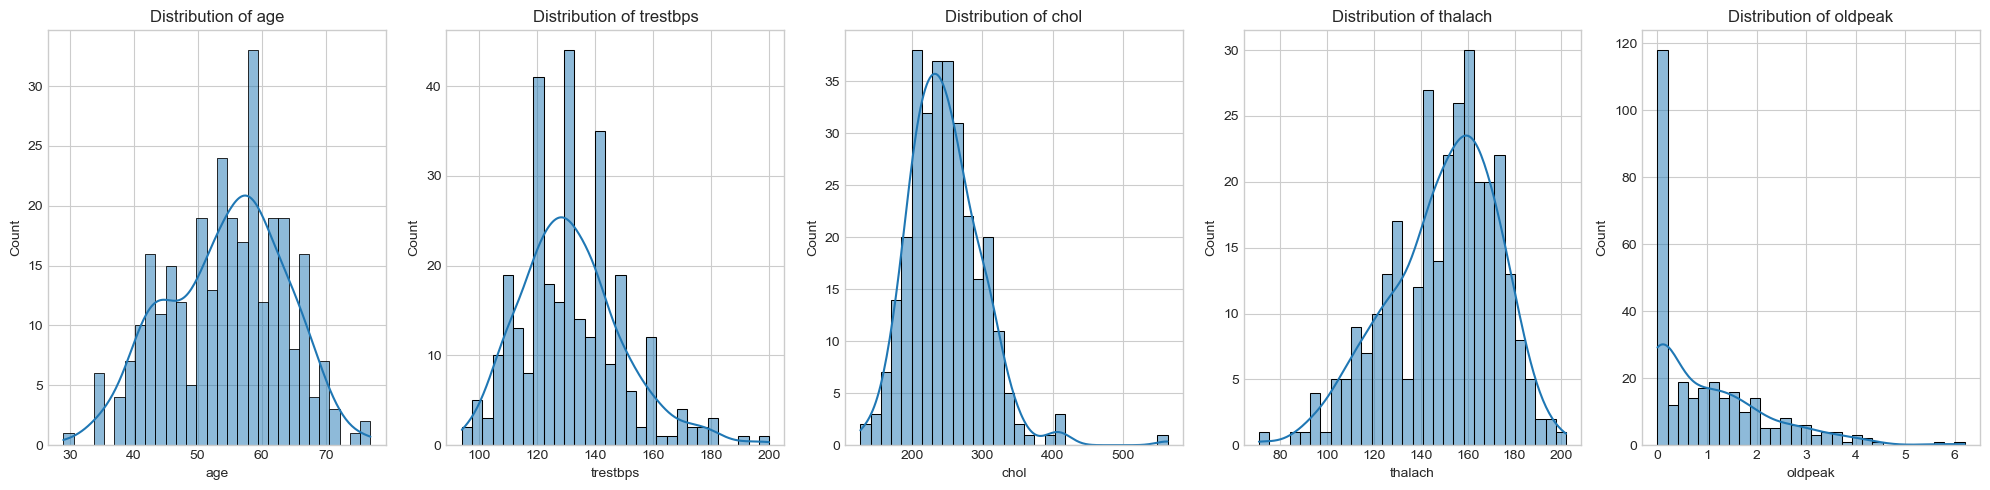

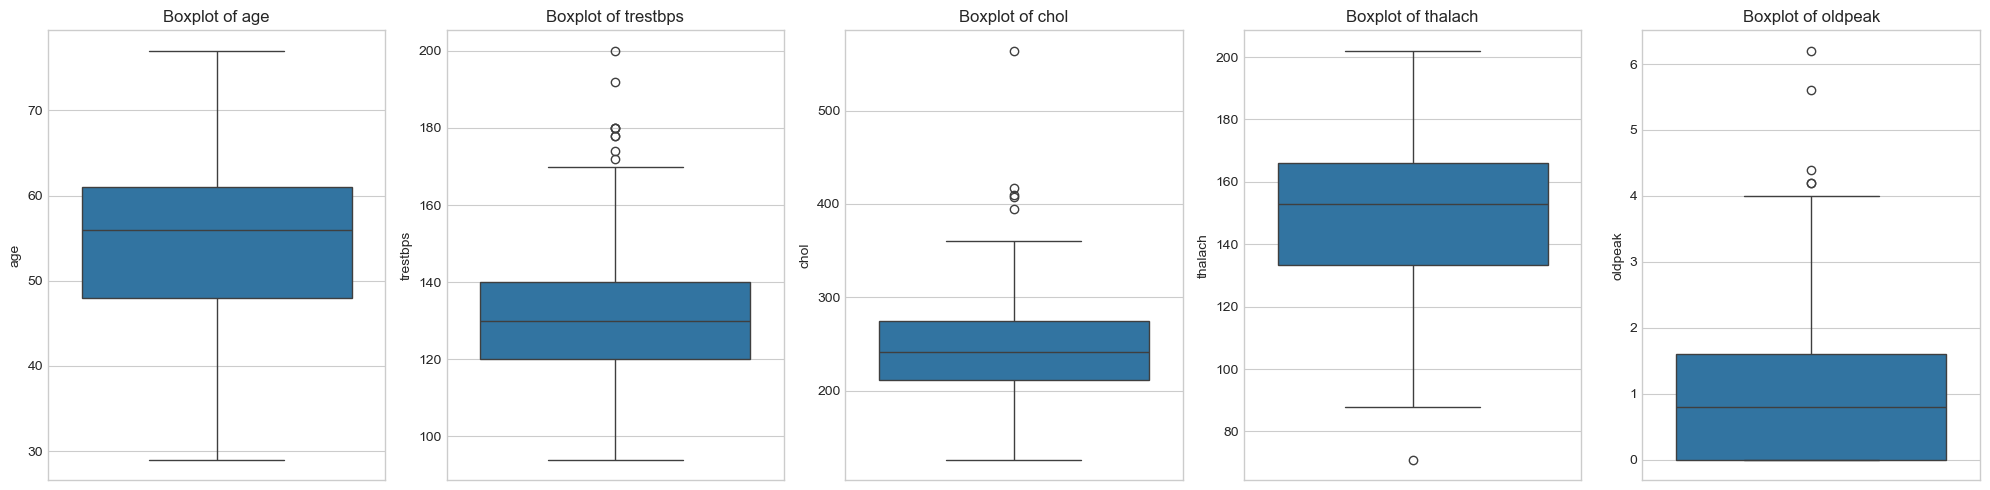

In [8]:
plt.style.use("seaborn-v0_8-whitegrid")
    
# Create figure for numeric features distribution
plt.figure(figsize=(15, 6))
    
    # Numeric features analysis
numeric_stats = X[numerical_features].describe()
    
    # Distribution plots for numeric features
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for idx, feature in enumerate(numerical_features):
    sns.histplot(data=X, x=feature, bins=30, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')
    plt.tight_layout()
    
    # Boxplots for numeric features
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for idx, feature in enumerate(numerical_features):
        sns.boxplot(data=X, y=feature, ax=axes[idx])
        axes[idx].set_title(f'Boxplot of {feature}')
plt.tight_layout()

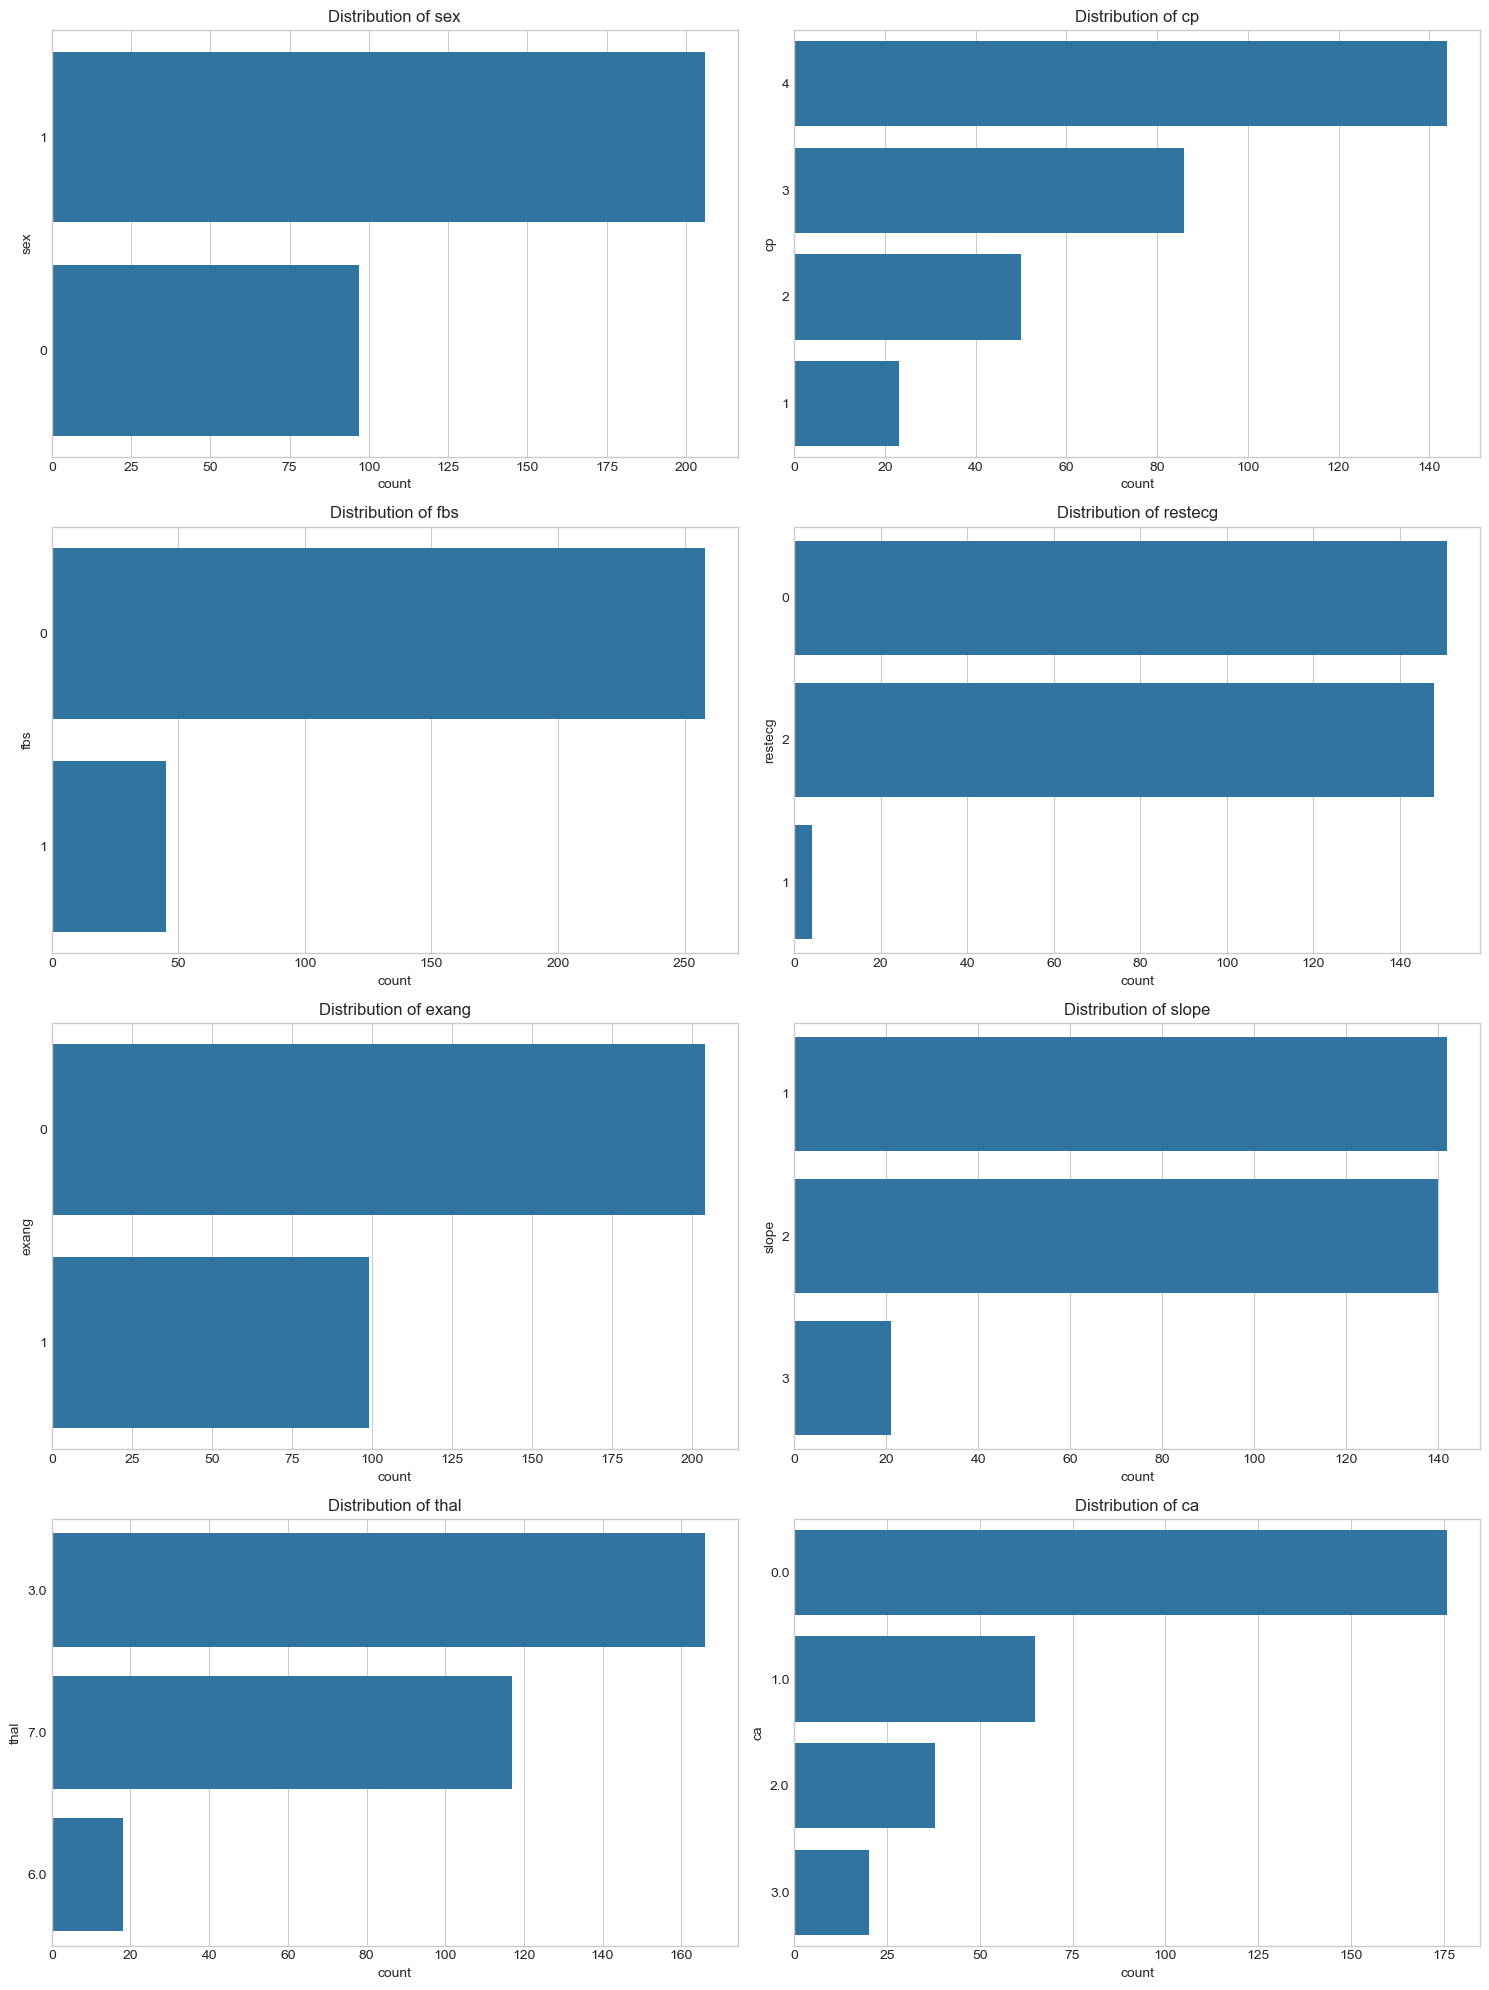

In [9]:

# crear barplots de las variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

    # Categorical features analysis
categorical_stats = {feature: X[feature].value_counts() for feature in categorical_features}
    
    # Bar plots for categorical features
num_cols = 2
num_rows = (len(categorical_features) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.ravel()
    
for idx, feature in enumerate(categorical_features):
    sns.countplot(data=X, y=feature, ax=axes[idx], order=X[feature].value_counts().index)
    axes[idx].set_title(f'Distribution of {feature}')
    
    # Remove empty subplots if any
if len(categorical_features) % num_cols != 0:
    for idx in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[idx])
    
plt.tight_layout()
    

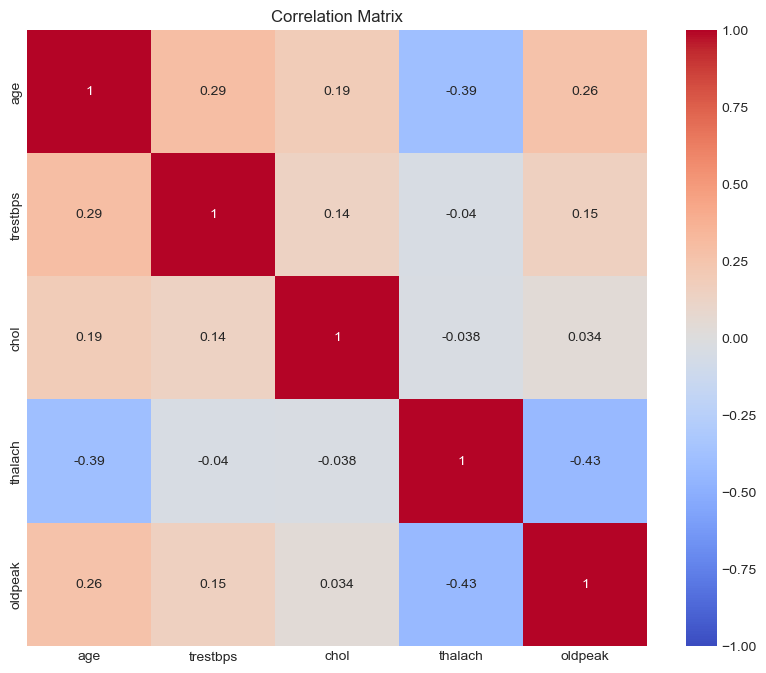

In [10]:

# calculate correlation with numerical_features
corr_matrix = X[numerical_features].corr(method='spearman')

# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


#### Valores Faltantes y Outliers:

- Detectar y tratar valores faltantes.
- Identificar y manejar outliers.


In [11]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [12]:
# Identify numerical columns
# numerical_columns = X.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_features:
    outliers = detect_outliers_iqr(X[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': X[column][~outliers].min(),
        'Upper Bound': X[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
age,0.0,0.000000,29.0,77.0
trestbps,9.0,2.970297,94.0,170.0
chol,5.0,1.650165,126.0,360.0
thalach,1.0,0.330033,88.0,202.0
oldpeak,5.0,1.650165,0.0,4.0


In [13]:
#Calculamos los valores nulos 
#Codigo Hecho por el profesor Iair Linker
def calculate_na_statistics(df: pd.DataFrame):
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na = pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %', ascending=False)

null_values = calculate_na_statistics(X)
null_values

,datos sin NAs en q,Na en q,Na en %
ca,299,4,1.32
thal,301,2,0.66
age,303,0,0.00
sex,303,0,0.00
cp,303,0,0.00
trestbps,303,0,0.00
chol,303,0,0.00
fbs,303,0,0.00
restecg,303,0,0.00
thalach,303,0,0.00


- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

_Como no pude encontrar si tienen alguna relacion con otras variables de nuestro dataset, como para ser entrenados y completados, decido elimnar estas lineas por ser datos sensibles._

In [14]:
# eliminar las lineas 87, 166, 192, 266, 287, 302 de X
X = X.drop([87, 166, 192, 266, 287, 302], axis=0)
X.shape

(297, 13)

In [15]:

#eliminar de Y
y = y.drop([87, 166, 192, 266, 287, 302], axis=0)
y.shape

(297, 1)


### **Parte 3:** Preprocesamiento de Datos

#### Transformación de Columnas:

- Codificar variables categóricas utilizando One-Hot Encoding.
- Escalar características numéricas utilizando StandardScaler.


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler, 
    OrdinalEncoder, 
    LabelEncoder, 
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score,
    average_precision_score
)
import xgboost as xgb

# Binary classification: 0 vs 1-4
y['num_binary'] = (y['num'] > 0).astype(int)
y = y.drop('num', axis=1)

# Define column types
numeric_features = numerical_features
ordinal_features = ['cp', 'ca']
onehot_features = ['sex', 'fbs', 'restecg', 'exang', 'slope', 'thal']


# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Numeric features - Imputation and Scaling
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        
        # Ordinal features - Ordinal Encoding
        ('ord', OrdinalEncoder(), ordinal_features),
        
        # One-Hot Encoded features
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_features)
    ])

# Create XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        objective='binary:logistic'
    ))
])



#### División del Conjunto de Datos:

- Dividir el dataset en conjuntos de entrenamiento y prueba.


In [17]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



### **Parte 4:** Implementación de XGBoost

#### Entrenamiento del Modelo:

- Entrenar un modelo de XGBoost con hiperparámetros básicos.
- Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.


In [18]:

# Fit the pipeline
xgb_pipeline.fit(X_train, y_train)

# Predictions
y_pred = xgb_pipeline.predict(X_test)
y_pred_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC and Precision-Recall
roc_auc = roc_auc_score(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)
print("\nROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)


Accuracy: 0.85

Confusion Matrix:
 [[29  3]
 [ 6 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


ROC AUC Score: 0.9006696428571429
Average Precision Score: 0.8568686983533917


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:09:41] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



#### Optimización de Hiperparámetros:

- Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.
- Evaluación del Modelo Optimizado:
- Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best Parameters:
classifier__colsample_bytree: 0.8
classifier__learning_rate: 0.1
classifier__max_depth: 3
classifier__min_child_weight: 5
classifier__n_estimators: 100
classifier__subsample: 0.6

Best ROC AUC Score: 0.9182787698412698

Top 5 Hyperparameter Configurations:
     param_classifier__n_estimators  param_classifier__max_depth  \
534                             100                            6   
453                             100                            3   
480                             100                            4   
507                             100                            5   
795                             100                            4   

     param_classifier__learning_rate  mean_test_score  rank_test_score  
534                              0.1         0.918279                1  
453                              0.1         0.918279                1  
480                              

c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:00] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:00] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

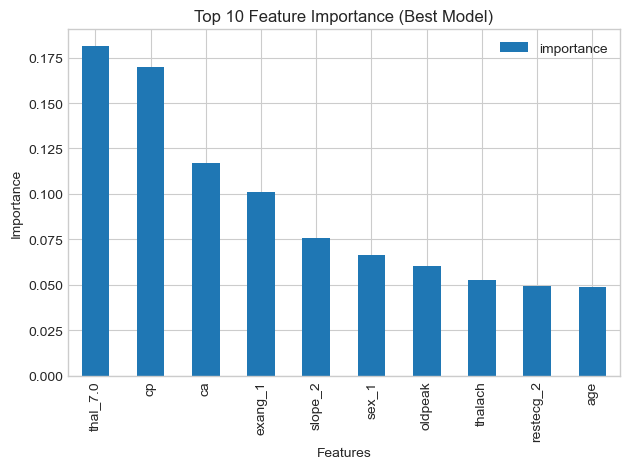

In [19]:
from sklearn.model_selection import GridSearchCV

# Create full pipeline with XGBoost
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        objective='binary:logistic'
    ))
])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__min_child_weight': [1, 3, 5]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    full_pipeline, 
    param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit Grid Search
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print results
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

print("\nBest ROC AUC Score:", grid_search.best_score_)

# Detailed CV Results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot Hyperparameter Performance
plt.figure(figsize=(10, 6))
cv_results_sorted = cv_results.sort_values('rank_test_score')
top_5_results = cv_results_sorted.head()

print("\nTop 5 Hyperparameter Configurations:")
print(top_5_results[['param_classifier__n_estimators', 'param_classifier__max_depth', 'param_classifier__learning_rate', 'mean_test_score', 'rank_test_score']])

# Final Evaluation with Best Model
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit best model
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nFinal Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature Importance for Best Model
preprocessor = best_model.named_steps['preprocessor']

# Get feature names
onehot_feature_names = list(preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_features))
feature_names = numeric_features + ordinal_features + onehot_feature_names

# Get feature importances
feature_importance = best_model.named_steps['classifier'].feature_importances_

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importance:")
print(importance_df.head(10))

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importance (Best Model)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


Top 10 Feature Importance:
     feature  importance
5         cp    0.259222
15  thal_7.0    0.183768
12   slope_2    0.140299
6         ca    0.102981
4    oldpeak    0.054707
7      sex_1    0.050021
0        age    0.037386
2       chol    0.034988
11   exang_1    0.033560
1   trestbps    0.031292


<Figure size 1000x600 with 0 Axes>

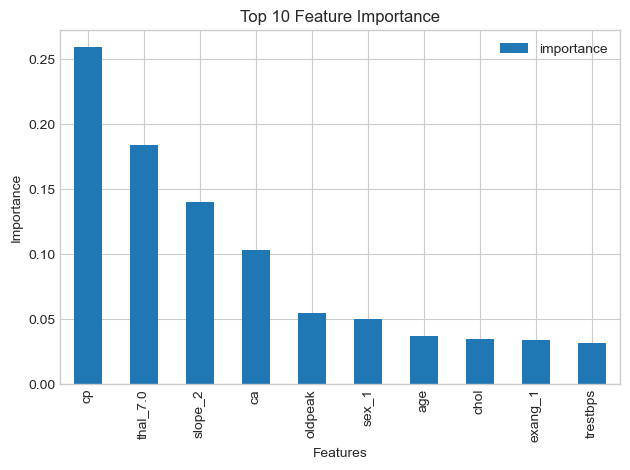

c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Cross-validation Results:
test_accuracy: 0.8012 (+/- 0.0769)
test_roc_auc: 0.8701 (+/- 0.0811)
test_average_precision: 0.8656 (+/- 0.0686)


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:10:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:


# Get preprocessed feature names
preprocessor = xgb_pipeline.named_steps['preprocessor']
    
# Get feature names
onehot_feature_names = list(preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_features))
# Combine all feature names
feature_names = numeric_features + ordinal_features + onehot_feature_names

# Get feature importances
feature_importance = xgb_pipeline.named_steps['classifier'].feature_importances_

    # Create feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importance:")
print(importance_df.head(10))

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

# Perform stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with multiple metrics
cv_results = cross_validate(
    xgb_pipeline, X, y, 
    cv=cv, 
    scoring=['accuracy', 'roc_auc', 'average_precision']
)

print("\nCross-validation Results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")